# CORONA VIRUS PROJECT

In [86]:
import pandas as pd
import numpy as np
import sklearn 
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

## Data pre-processing 

In [87]:
from pandas import read_excel
# find your sheet name at the bottom left of your excel file and assign 
# it to my_sheet 
my_sheet = 'Train_dataset'
file_name = 'C:\\Users\\Het Patel\\Desktop\\flipr\\train.xlsx' # name of your excel file
df = read_excel(file_name, sheet_name = my_sheet)
print(df.head(2))

   people_ID        Region  Gender Designation       Name Married  Children  \
0          1  Bhubaneshwar  Female         Mrs      mansi     YES       1.0   
1          2  Bhubaneshwar  Female         Mrs  riya masi     YES       2.0   

  Occupation Mode_transport  cases/1M  ...   HBB d-dimer  Heart rate  \
0     Farmer         Public         2  ...  93.0   233.0        82.0   
1     Farmer           Walk         2  ...  56.0   328.0        89.0   

   HDL cholesterol Charlson Index Blood Glucose  Insurance   salary  FT/month  \
0             58.0             27             7  3600000.0  1300000       2.0   
1             68.0              5             6  1600000.0   400000       1.0   

   Infect_Prob  
0     49.13501  
1     51.14788  

[2 rows x 28 columns]


In [88]:
df.shape

(10714, 28)

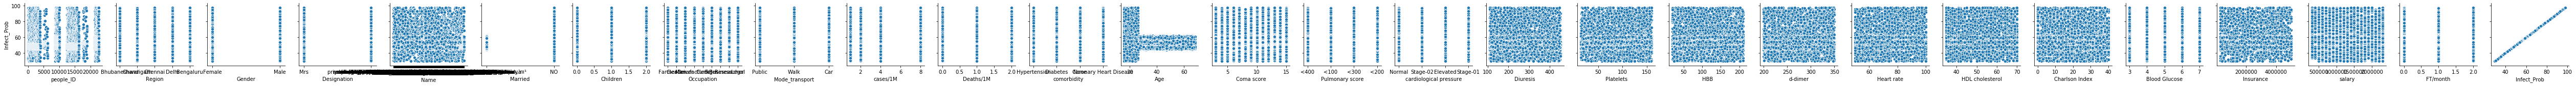

In [46]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.pairplot(df, x_vars = df.columns.tolist(), y_vars = ['Infect_Prob'])

In [89]:
#check for missing value
for col in df:
    print (col, df[col].count())

people_ID 10714
Region 10714
Gender 10714
Designation 10714
Name 10694
Married 10714
Children 10403
Occupation 9967
Mode_transport 10711
cases/1M 10714
Deaths/1M 10714
comorbidity 10488
Age 10714
Coma score 10714
Pulmonary score 10714
cardiological pressure 10617
Diuresis 9998
Platelets 9790
HBB 10698
d-dimer 9600
Heart rate 9600
HDL cholesterol 10679
Charlson Index 10714
Blood Glucose 10714
Insurance 9624
salary 10714
FT/month 9991
Infect_Prob 10714


In [90]:
df.describe()

,people_ID,Children,cases/1M,Deaths/1M,Age,Coma score,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
count,10714.000000,10403.000000,10714.000000,10714.000000,10714.000000,10714.000000,9998.000000,9790.000000,10698.000000,9600.000000,9600.000000,10679.000000,10714.000000,10714.000000,9.624000e+03,1.071400e+04,9991.000000,10714.000000
mean,10084.893784,1.062770,3.285888,0.523241,42.083722,9.013067,278.806261,87.795812,116.170967,275.292292,74.847396,52.632737,20.028094,5.015027,2.644919e+06,1.304713e+06,1.004604,52.280680
std,7108.663645,0.818222,2.721274,0.854303,15.323397,3.714970,97.985526,41.851103,55.178811,43.669692,14.869104,10.434293,11.828445,1.399770,1.383346e+06,6.075947e+05,0.815257,10.674667
min,1.000000,0.000000,1.000000,0.000000,16.000000,3.000000,110.000000,15.000000,20.000000,200.000000,50.000000,35.000000,0.000000,3.000000,3.000000e+05,3.000000e+05,0.000000,29.289600
25%,2679.250000,0.000000,2.000000,0.000000,29.000000,6.000000,194.000000,52.000000,68.000000,237.000000,62.000000,44.000000,10.000000,4.000000,1.400000e+06,8.000000e+05,0.000000,47.277426
50%,10003.500000,1.000000,2.000000,0.000000,42.000000,9.000000,276.000000,88.000000,117.000000,276.000000,75.000000,53.000000,20.000000,5.000000,2.600000e+06,1.300000e+06,1.000000,49.008389
75%,15141.750000,2.000000,4.000000,1.000000,55.000000,12.000000,364.000000,124.000000,165.000000,313.000000,88.000000,62.000000,30.000000,6.000000,3.800000e+06,1.800000e+06,2.000000,52.762313
max,22695.000000,2.000000,8.000000,2.000000,68.000000,15.000000,450.000000,160.000000,210.000000,350.000000,100.000000,70.000000,40.000000,7.000000,5.000000e+06,2.300000e+06,2.000000,97.632000


In [91]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [94]:
X_train.shape
df.drop("Name", axis=1, inplace=True)

In [95]:
pd.get_dummies(df['Region'])
region = pd.get_dummies(df['Region'],drop_first=True)
region.head(5)

,Bhubaneshwar,Chandigarh,Chennai,Delhi
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [96]:
pd.get_dummies(df['Gender'])
gender = pd.get_dummies(df['Gender'],drop_first=True)
gender.head(5)

,Male
0,0
1,0
2,0
3,0
4,0


In [97]:
pd.get_dummies(df['Designation'])
designation = pd.get_dummies(df['Designation'],drop_first=True)
designation.head(5)

,Mrs
0,1
1,1
2,1
3,1
4,1


In [98]:
pd.get_dummies(df['Married'])
married = pd.get_dummies(df['Married'],drop_first=True)
married.head(5)

,YES
0,1
1,1
2,0
3,1
4,0


In [99]:
pd.get_dummies(df['Occupation'])
occupation = pd.get_dummies(df['Occupation'],drop_first=True)
occupation.head(5)

,Cleaner,Clerk,Driver,Farmer,Legal,Manufacturing,Researcher,Sales
0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0


In [100]:
pd.get_dummies(df['Mode_transport'])
mode_transport = pd.get_dummies(df['Mode_transport'],drop_first=True)
mode_transport.head(5)

,Public,Walk
0,1,0
1,0,1
2,1,0
3,0,0
4,0,0


In [101]:
pd.get_dummies(df['comorbidity'])
comorbidity = pd.get_dummies(df['comorbidity'],drop_first=True)
comorbidity.head(5)

,Diabetes,Hypertension,None
0,0,1,0
1,1,0,0
2,0,0,1
3,0,0,0
4,1,0,0


In [102]:
pd.get_dummies(df['Pulmonary score'])
pulmonary_score = pd.get_dummies(df['Pulmonary score'],drop_first=True)
pulmonary_score.head(5)

,<200,<300,<400
0,0,0,1
1,0,0,0
2,0,1,0
3,1,0,0
4,0,0,1


In [103]:
pd.get_dummies(df['cardiological pressure'])
cardiological_pressure = pd.get_dummies(df['cardiological pressure'],drop_first=True)
cardiological_pressure.head(5)

,Normal,Stage-01,Stage-02
0,1,0,0
1,0,0,1
2,0,0,0
3,0,1,0
4,1,0,0


In [106]:
df = pd.concat([df,region,gender,designation,married,occupation,mode_transport,comorbidity,pulmonary_score,cardiological_pressure],axis=1)
df.head(5)

,Bhubaneshwar,Chandigarh,Chennai,Delhi,Male,Mrs,YES,Cleaner,Clerk,Driver,...,Walk,Diabetes,Hypertension,None,<200,<300,<400,Normal,Stage-01,Stage-02
0,1,0,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,1,1,0,0
1,1,0,0,0,0,1,1,0,0,0,...,1,1,0,0,0,0,0,0,0,1
2,1,0,0,0,0,1,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
3,1,0,0,0,0,1,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
4,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0


In [109]:
 print(df.head(1))

   Bhubaneshwar  Chandigarh  Chennai  Delhi  Male  Mrs  YES  Cleaner  Clerk  \
0             1           0        0      0     0    1    1        0      0   

   Driver  ...  Walk  Diabetes  Hypertension  None  <200  <300  <400  Normal  \
0       0  ...     0         0             1     0     0     0     1       1   

   Stage-01  Stage-02  
0         0         0  

[1 rows x 52 columns]


## Training and Testing the data 

In [120]:
X = df.iloc[:,50].values
Y = df.iloc[:,51].values

import sklearn 
from sklearn.model_selection import train_test_split

In [127]:

from sklearn import model_selection

In [145]:
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size = 0.99, random_state=1)
import warnings
warnings.filterwarnings("ignore")

In [146]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [147]:
predictions = logmodel.predict(X_test)

In [148]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [149]:
classification_report(Y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.75      1.00      0.86      7997\n           1       0.00      0.00      0.00      2610\n\n    accuracy                           0.75     10607\n   macro avg       0.38      0.50      0.43     10607\nweighted avg       0.57      0.75      0.65     10607\n'

In [150]:
confusion_matrix(Y_test,predictions)

array([[7997,    0],
       [2610,    0]], dtype=int64)

In [151]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,predictions)

0.7539360799472047